# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Creating a perfect correlated dataset

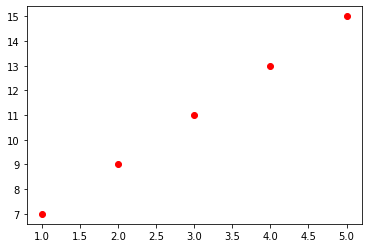

In [2]:
def linear_eq(x, A, B):
    return A*x + B  # linear equation

x = np.array([1,2,3,4,5])  # input
A = 2
B = 5

y = linear_eq(x, A, B)  # output
plt.plot(x, y, 'ro')

### First linear fitting

In [3]:
a,b = np.polyfit(x, y, 1)
print(a, b)

2.0 4.9999999999999964


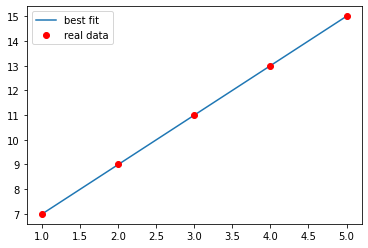

In [4]:
y1 = linear_eq(x, a, b)  #best fit

plt.plot(x, y1, label='best fit')
plt.plot(x, y, 'ro', label='real data')
plt.legend()

## Adding some noise

2.272635958404716 4.494113066379601


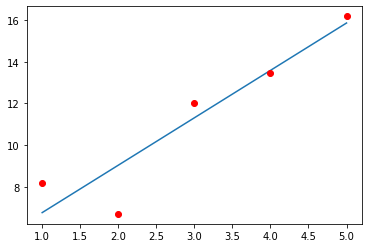

In [5]:
noise = np.random.normal(0, 1, len(x))
y = linear_eq(x, A, B) + noise

a,b = np.polyfit(x, y, 1)
print(a, b)
y1 = linear_eq(x, a, b)

plt.plot(x, y1, label='best fit')
plt.plot(x, y, 'ro', label='real data')


## Making predictions

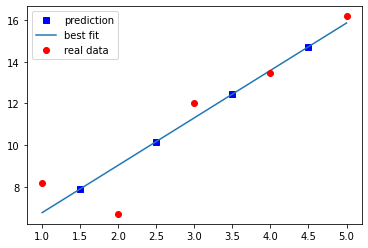

In [6]:
x_pred = np.array([1.5,2.5,3.5,4.5])  # x set to predict
y_pred = linear_eq(x_pred, a, b)

plt.plot(x_pred, y_pred, 'sb', label='prediction')
plt.plot(x, y1, label='best fit')
plt.plot(x, y, 'ro', label='real data')
plt.legend()

## Validation

In [7]:
N = len(x)
x_train = x[0: N-2]  # x set to train
y_train = y[0: N-2]  # y set to train

x_eval = x[-2:N] # x set to evaluate
y_eval = y[-2:N] # y set to evaluate

In [8]:
print(x)
print(x_train, x_eval)

[1 2 3 4 5]
[1 2 3] [4 5]


### Training

2.272635958404716 4.494113066379601
1.916743782016765 5.141231436477994


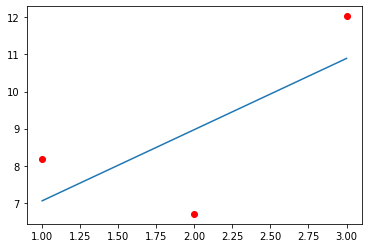

In [9]:
a1, b1 = np.polyfit(x_train, y_train, 1)
print(a, b)
print(a1, b1)

y1 = linear_eq(x_train, a1, b1)

plt.plot(x_train, y1)
plt.plot(x_train, y_train, 'ro')

### Evaluating


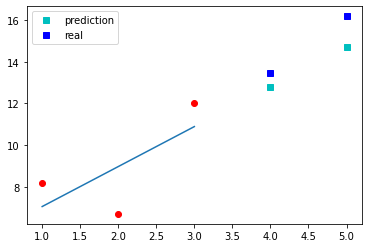

In [10]:
y2 = linear_eq(x_eval, a1, b1)

plt.plot(x_train, y1)
plt.plot(x_train, y_train, 'ro')

plt.plot(x_eval, y2, 'sc', label='prediction')
plt.plot(x_eval, y_eval, 'sb', label='real')
plt.legend()

In [11]:
msre = np.sqrt((np.square(y_eval - y2)).mean())
print(msre)

1.1266069254938813


## Titanic Example!

You will use the Titanic dataset with the (rather morbid) goal of predicting passenger survival, given characteristics such as gender, age, class, etc.

This example (with a complete explanation) is provided by TensorFlow [here](https://www.tensorflow.org/tutorials/estimator/linear).

### Load the Titanic dataset

In [12]:
import pandas as pd

# Load the training dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')

# Load the evaluation dataset
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

### Explore the data

In [13]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [14]:
dfeval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [15]:
dftrain.shape[0], dfeval.shape[0]

(627, 264)

#### Age distribution

<AxesSubplot:>

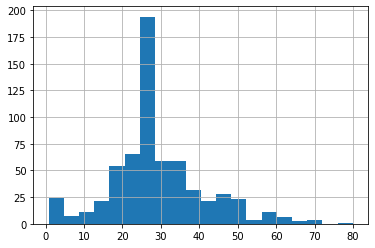

In [16]:
dftrain.age.hist(bins=20)

#### Sex distribution

<AxesSubplot:>

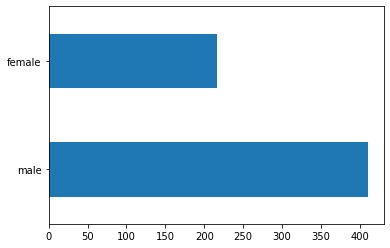

In [17]:
dftrain.sex.value_counts().plot(kind='barh')

#### Class distribution

<AxesSubplot:>

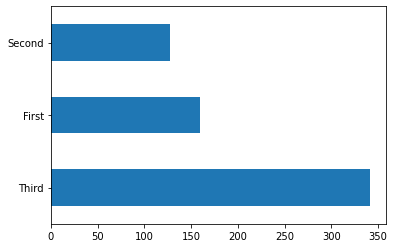

In [18]:
dftrain['class'].value_counts().plot(kind='barh')

### Getting the target variable column

In [19]:
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [20]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [21]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

Text(0.5, 0, '% survive')

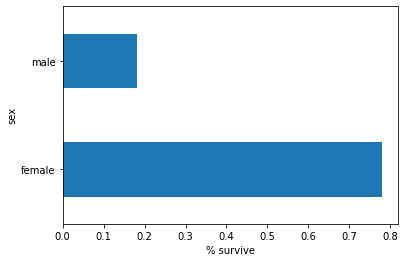

In [22]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

### Feature Engineering for the Model

see more [here](https://www.tensorflow.org/tutorials/estimator/linear#feature_engineering_for_the_model)

In [23]:
feature_columns = []

#### Categorical data

In [24]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [25]:
dftrain["sex"].unique()

array(['male', 'female'], dtype=object)

In [26]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']

import tensorflow as tf

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

In [27]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

#### Numerical data

In [28]:
NUMERIC_COLUMNS = ['age', 'fare']

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

#### Defining the model

In [29]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)  # similar to y = Bx + A

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpeg1kn9nq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Organizing the input data

* epoch: number of repetition
* shuffle: True or False
* batch: batch size

In [30]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

#### Training the model with the organized input data

In [31]:
from IPython.display import clear_output

train_input_fn = make_input_fn(dftrain, y_train)
linear_est.train(train_input_fn)
clear_output()

#### Evaluating

In [32]:
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy']*100)

75.0


### Prediction

In [33]:
result = list(linear_est.predict(eval_input_fn))  # has information about all individuals in eval_input_fn

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpeg1kn9nq/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [41]:
i = 105 # individual i

print(result[i]['probabilities'][1]*100,'% of survivel rate') # individual i survival rate
print(dfeval.loc[i])  # individual i original information
print(y_eval.loc[i])  # individual i survivel info: 0 = Not, 1 = Yes

18.037672340869904 % of survivel rate
sex                        male
age                          20
n_siblings_spouses            0
parch                         0
fare                     4.0125
class                     Third
deck                    unknown
embark_town           Cherbourg
alone                         y
Name: 105, dtype: object
0
